## Today, We Are Taking a Look at Where Energy Gets Used Industry-wise

We've already seen some information regarding the trajectory of renewables and non-renewables, but what about where they are being used ? Is there something interesting to discover there ? 

We'll start with our data cleaning practices which should start to become quite familiar. 

In [138]:
# import the essential libraries (& some non-essential ones)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load two different datasets in xlsx format
df1 = pd.ExcelFile('46040DO0001_2022_23.xlsx')
df2 = pd.ExcelFile('46040DO0002_2022_23.xlsx')

# print the sheet names of the loaded datasets
print("Sheet names in data1.xlsx:", df1.sheet_names)
print("Sheet names in data2.xlsx:", df2.sheet_names)

Sheet names in data1.xlsx: ['Contents', 'Data']
Sheet names in data2.xlsx: ['Contents', 'Data']


In [139]:
# load data
df1 = df1.parse('Data', skiprows=5, skipfooter=4)
df2 = df2.parse('Data', skiprows=4, skipfooter=6)


# df1
df1 = df1.iloc[9:].copy()
df1.columns = [str(col) for col in df1.columns]

# set date to index
df1.index = pd.to_datetime(df1.iloc[:, 0], errors='coerce')
df1 = df1.set_index(df1.columns[0])

# convert columns to numeric, ignoring errors
for col in df1.columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# reset index
df1.reset_index(inplace=True)
df1.rename(columns={df1.columns[0]: 'Date'}, inplace=True)
df1.set_index('Date', inplace=True)

# df2 -- recycle and repeat
df2 = df2.iloc[9:].copy()
df2.columns = [str(col) for col in df2.columns]
df2.index = pd.to_datetime(df2.iloc[:, 0], errors='coerce')
df2 = df2.set_index(df2.columns[0])
for col in df2.columns:
    df2[col] = pd.to_numeric(df2[col], errors='coerce')
df2.reset_index(inplace=True)
df2.rename(columns={df2.columns[0]: 'Date'}, inplace=True)
df2.set_index('Date', inplace=True)

# works fine, remove the warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


## Data Cleaning
I couuld have turned this into a function, and if it was more than 2 I would have, but given that the datasets are slightly different and there are only two I decided to repeat it. 

Works fine, and was unable to find out what was causing the warnings, so removed it. I procedd to then examine the data and merge it so I'm only working from 1 dataset and can compare against them. 

In [143]:
# view the data -- note i removed 2024 row from df2 for consistency across datasets
df1
df2.head(3)

,Energy stock - Black coal Gt (a),Energy stock - Black coal PJ (a),Energy stock - Black coal $m,Energy stock - Brown coal Gt (a),Energy stock - Brown coal PJ (a),Energy stock - Brown coal $m,Energy stock - Crude oil GL (a),Energy stock - Crude oil PJ (a),Energy stock - Crude oil $m,Energy stock - Condensate GL (a),...,Energy stock - Uranium kt U (a),Energy stock - Uranium PJ (a),Energy stock - Uranium $m,Remaining resource life - Black coal,Remaining resource life - Brown coal,Remaining resource life - Crude oil,Remaining resource life - Condensate,Remaining resource life - LPG,Remaining resource life - Natural gas,Remaining resource life - Uranium
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,49.7,1341900,73699,46.6,456680,731,146.2,5409.4,51326,321.7,...,1175.5,658280,400,142.8,709.3,10.0,37.8,44.2,48.3,199.2
2012-06-01,59.3,1601100,59872,49.1,481180,227,142.3,5265.1,49153,308.3,...,1183.5,662760,182,162.2,735.8,10.7,41.7,43.8,47.9,169.1
2013-06-01,61.6,1663200,18380,49.1,481180,304,144.5,5346.5,40922,289.9,...,1170.5,655480,384,154.6,787.7,14.7,38.7,47.1,38.5,182.9


In [141]:
# merge the two datasets on their index (Date)
df_merged = df1.merge(df2, left_index=True, right_index=True, suffixes=('_df1', '_df2'))


In [145]:
for col in df_merged.columns:
    print(col)

Net energy supply/use - total
Energy from natural inputs - black coal
Energy from natural inputs - brown coal
Energy from natural inputs - natural gas
Energy from natural inputs - uranium
Energy from natural inputs - crude oil, condensates and other petroleum products
Total energy import
Energy import - Petrol
Energy import - Diesel and fuel oil
Energy import - Crude oil, condensates and other petroleum products
Renewable energy supply of total domestic net energy use
Share of renewable energy in net energy inputs
Renewable sources - hydro energy
Renewable sources - solar energy
Renewable sources - wind energy
Net Energy use - Agriculture, forestry and fishing
Net Energy use - Mining
Net Energy use - Manufacturing
Net energy use - Electricity, gas, water and waste services
Net Energy use - Construction
Net Energy use - Transport, postal and warehousing 
Net Energy use - Commercial and Services (a)
Net Energy use - Total industry
Energy intensity - Agriculture (a)
Energy intensity - Min

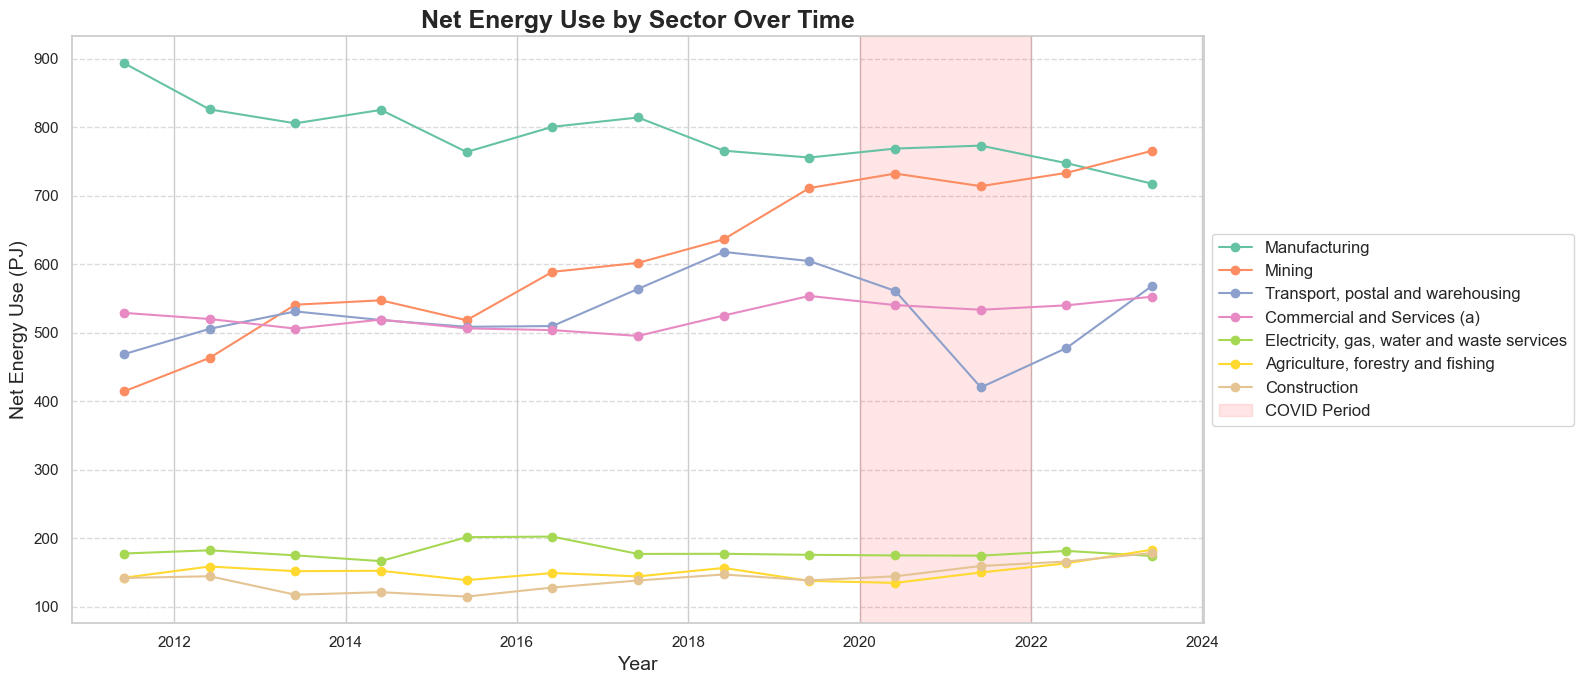

In [176]:
# let's look at energy use over time, by industry
columns_of_interest = [
    'Net Energy use - Agriculture, forestry and fishing',
    'Net Energy use - Mining',
    'Net Energy use - Manufacturing',
    'Net energy use - Electricity, gas, water and waste services',
    'Net Energy use - Construction',
    'Net Energy use - Transport, postal and warehousing ',
    'Net Energy use - Commercial and Services (a)',
]

# plot it
sns.set_theme(style="whitegrid", palette="colorblind")

# order the legend
columns_of_interest = sorted(columns_of_interest, key=lambda x: df_merged[x].mean(), reverse=True)

plt.figure(figsize=(16, 7))
palette = sns.color_palette("Set2", len(columns_of_interest))
for i, col in enumerate(columns_of_interest):
    label = col.replace('Net Energy use - ', '').replace('Net energy use - ', '').strip()
    plt.plot(df_merged.index, df_merged[col], label=label, linewidth=1.5, marker='o', color=palette[i])

plt.axvspan(pd.Timestamp('2020-01-01'), pd.Timestamp('2021-12-31'), 
            color='red', alpha=0.1, label='COVID Period')
plt.title('Net Energy Use by Sector Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Energy Use (PJ)', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12, frameon=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Energy Use By Sectory

Visually, we can already see 3 different groupings. And we can also see the gradual decline of Manufacturing and and moderate increase of Mining. 
Noting the dip, I also though it was relevant to add in the COVID period as it was instructive with transport taking the biggest hit to usage, and surprisingly manufacturing increasing ? 

This tells a story of sector usage, but it also tells a story of the Australian economy. 

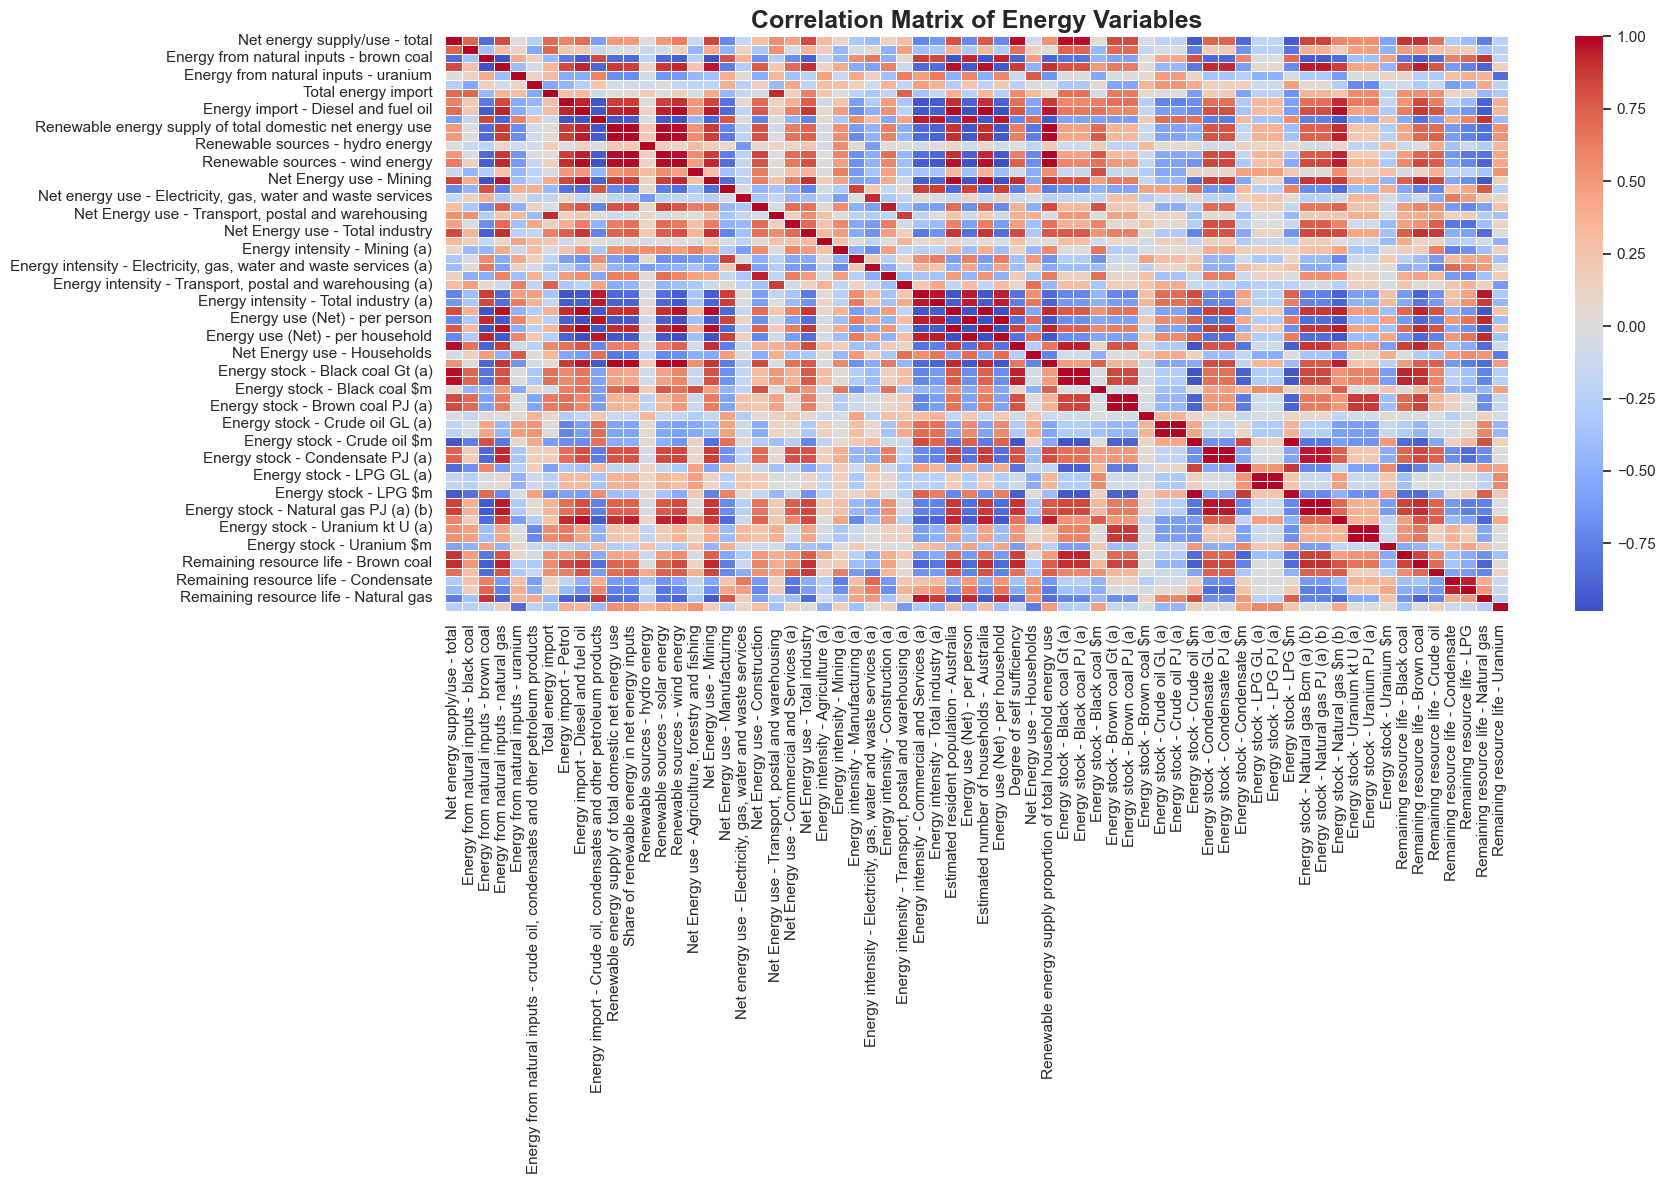

In [162]:
# let's see what this dataset has to offer
corr = df_merged.corr(numeric_only=True)
plt.figure(figsize=(18, 12))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, linewidths=.5)
plt.title('Correlation Matrix of Energy Variables', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


## That's a little much, isn't it ? 
It might seem a little much at first, but it is actually useful, first of all we can look at areas with deep red or blue to see their relationships. As I print them out below. First of all there will be a lot of obvious high correlations, but there are intersting relationships within as well. For example, start with the first row: Net Energy Use. You'll see it's correlated with energy usage in minning and inversely with energy usage in manufacturing. Reiterating that picture of an economy of decreasing importance on manufacturing. 

Given the difficulties however, we can also print out the top of each category. And pick one to dive deeper into. That's the purpose of this graph, to give us material to dive deeper on. 


In [163]:
corr_pairs = corr.unstack().dropna()
# Drop self-correlation and duplicate pairs
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
corr_pairs = corr_pairs.groupby([frozenset(x) for x in corr_pairs.index]).mean()

# Sort by correlation value
sorted_corr = corr_pairs.sort_values(ascending=False)

print("Top positive correlations:\n", sorted_corr.head(10))
print("\nTop negative correlations:\n", sorted_corr.tail(10))


Top positive correlations:
 (Energy stock - Condensate GL (a), Energy stock - Condensate PJ (a))                                                  1.000000
(Energy stock - Brown coal Gt (a), Energy stock - Brown coal PJ (a))                                                  1.000000
(Energy stock - Black coal Gt (a), Energy stock - Black coal PJ (a))                                                  1.000000
(Energy stock - Uranium kt U (a), Energy stock - Uranium PJ (a))                                                      1.000000
(Energy stock - Crude oil PJ (a), Energy stock - Crude oil GL (a))                                                    1.000000
(Energy stock - Natural gas Bcm (a) (b), Energy stock - Natural gas PJ (a) (b))                                       1.000000
(Energy stock - LPG PJ (a), Energy stock - LPG GL (a))                                                                1.000000
(Energy use (Net) - per person, Energy use (Net) - per household)                  

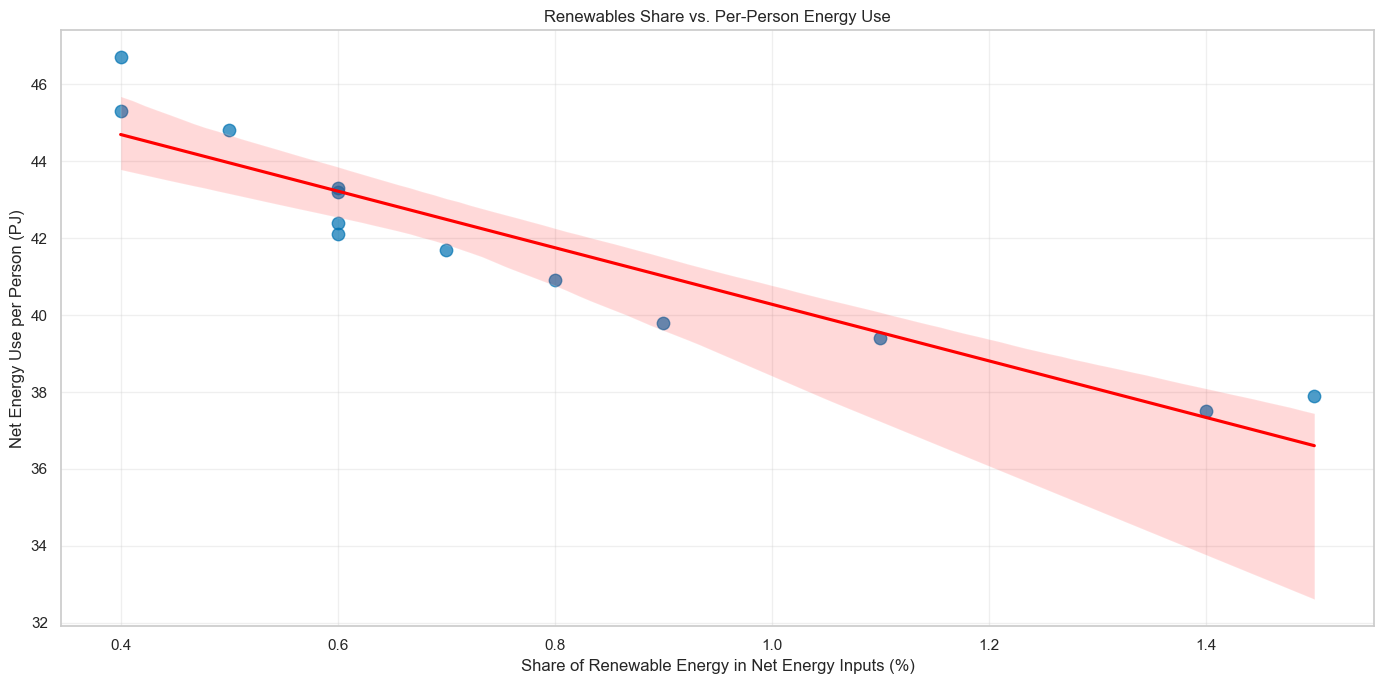

In [180]:
plt.figure(figsize=(14,7))
sns.regplot(
    x=df_merged['Share of renewable energy in net energy inputs'],
    y=df_merged['Energy use (Net) - per person'],
    scatter_kws={'s':80, 'alpha':0.7},
    line_kws={'color':'red'}
)
plt.xlabel('Share of Renewable Energy in Net Energy Inputs (%)')
plt.ylabel('Net Energy Use per Person (PJ)')
plt.title('Renewables Share vs. Per-Person Energy Use')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Renewables Share vs. Per-Person Energy Use

This scatter plot reveals a notable inverse relationship between renewable energy adoption and per-person energy consumption in Australia:

- As the share of renewable energy increases, per-person energy use tends to decrease
- The negative correlation suggests efficiency improvements may accompany renewable transitions
- The relationship isn't perfectly linear, with some outlier years showing different patterns

This trend could indicate that investments in renewable energy coincide with broader energy efficiency measures, or that the transition to renewables inherently drives more efficient energy use practices. It might also reflect changes in consumer behavior as awareness of energy sustainability grows.



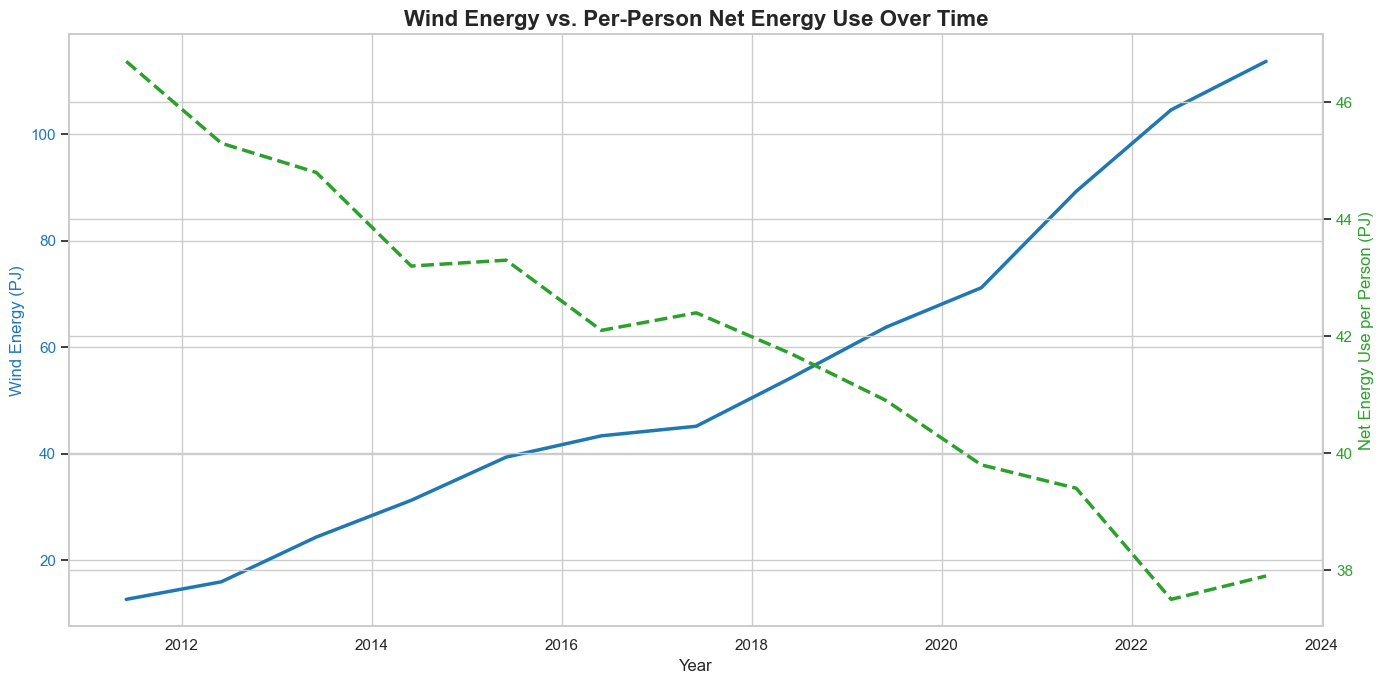

In [182]:
fig, ax1 = plt.subplots(figsize=(14,7))

color1 = 'tab:blue'
color2 = 'tab:green'

# First axis: Wind energy over time
ax1.set_xlabel('Year')
ax1.set_ylabel('Wind Energy (PJ)', color=color1)
ax1.plot(df_merged.index, df_merged['Renewable sources - wind energy'], color=color1, linewidth=2.5, label='Wind Energy')
ax1.tick_params(axis='y', labelcolor=color1)

# Second axis: Per person energy use over time
ax2 = ax1.twinx()
ax2.set_ylabel('Net Energy Use per Person (PJ)', color=color2)
ax2.plot(df_merged.index, df_merged['Energy use (Net) - per person'], color=color2, linewidth=2.5, linestyle='--', label='Per Person Use')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Wind Energy vs. Per-Person Net Energy Use Over Time', fontsize=16, fontweight='bold')
fig.tight_layout()
plt.show()


## Wind Energy Growth vs. Per-Person Energy Trends

The dual-axis chart above illustrates two important energy trends in Australia:

- **Wind energy** (blue line) shows dramatic growth, particularly accelerating after 2010
- **Per-person energy use** (green dashed line) shows a gradual decline over the same period

This inverse relationship is particularly striking after 2010, when wind energy begins its steepest climb while per-person consumption begins a more pronounced decline. The divergence suggests that Australia's energy transition is successfully reducing individual energy footprints while increasing clean energy production.

## Conclusion: Australia's Energy Transformation

Our analysis of energy usage across Australian sectors reveals a complex transformation in progress:

1. **Sectoral Shifts**: Mining energy use is growing while manufacturing declines, reflecting Australia's economic evolution

2. **Efficiency Gains**: The inverse relationship between renewable adoption and per-person energy use indicates a more efficient energy future

3. **COVID Impact**: The pandemic created distinct but temporary disruptions across sectors, with transportation seeing the largest reduction

These patterns tell a story beyond just energy statistics - they provide insights into Australia's economic priorities, technological advancements, and progress toward sustainability goals. As wind and other renewable sources continue their rapid growth, Australia appears to be successfully decoupling energy consumption from economic growth.

